## Part 1 : EDA

In [263]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [264]:
# Reading the input data 
data = pd.read_csv('input.csv')
data.head()

,customer_id,order_number,order_date,item_quantity_ordered,revenue,cumulative_revenue,customer_region,customer_gender,device,cost_of_living_rank,customer_lifetime_value
0,d43cc724338819d3e6d86e4db4ae2525,fb69e40b059fc2c951ad2e9abd3cbdb4,2019-01-24,1,100.83,0.00,Nordrhein-Westfalen,f,desktop,8.0,0.00
1,e80173bffd43eaa806445a602c994a47,0a9c5da004072e042268d803d0682d6a,2019-01-09,3,277.29,0.00,Schlewig-Holstein,m,mobile,5.0,0.00
2,4ac7f94acda12131bd8380a6893b4e92,914981f42f4cae42023d0c18ef27d4b9,2019-01-29,1,42.01,672.25,Nordrhein-Westfalen,f,desktop,7.0,0.00
3,375338a5a6fe1ed0c01cfd2647faa89f,d6f752b53a133dd6640ad6d0aad20ffb,2019-01-06,1,571.42,0.00,Bayern,m,tablet,9.0,402.84
4,31472192d34b462b6b951ed33ec0c65c,015704b78f7970d33bb9be0396d5adc0,2019-01-18,4,678.96,278.55,Hessen,m,desktop,7.0,100.82


### Checking the structure, missing values, datatypes and distribution of the data


In [265]:
# xgecking the shape of the data
data.shape

(55161, 11)

In [266]:
# column information#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55161 entries, 0 to 55160
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              55161 non-null  object 
 1   order_number             55161 non-null  object 
 2   order_date               55161 non-null  object 
 3   item_quantity_ordered    55161 non-null  int64  
 4   revenue                  55161 non-null  float64
 5   cumulative_revenue       55161 non-null  float64
 6   customer_region          51348 non-null  object 
 7   customer_gender          55161 non-null  object 
 8   device                   55161 non-null  object 
 9   cost_of_living_rank      54885 non-null  float64
 10  customer_lifetime_value  55161 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 4.6+ MB


In [267]:
# checking for missing values
data.isnull().sum()

customer_id                   0
order_number                  0
order_date                    0
item_quantity_ordered         0
revenue                       0
cumulative_revenue            0
customer_region            3813
customer_gender               0
device                        0
cost_of_living_rank         276
customer_lifetime_value       0
dtype: int64

As we can see there are some missing values in two of the columns 'customer_region' and 'cost_of_living_rank'. We will see how we handle them in preprocessing part


In [268]:
# checking number of unique values for categorical columns
data.select_dtypes('object').nunique()



customer_id        55161
order_number       55161
order_date            31
customer_region       15
customer_gender        3
device                 4
dtype: int64

The data seems well-structured, with a few notable points:

* Missing Values: customer_region and cost_of_living_rank have missing values.
* Data Types: order_date should be converted to a datetime format for better analysis.
* Target Variable: customer_lifetime_value is the target for our prediction model.

In [269]:
# Checking description of the dataset
data.describe()

,item_quantity_ordered,revenue,cumulative_revenue,cost_of_living_rank,customer_lifetime_value
count,55161.000000,55161.000000,55161.000000,54885.000000,55161.000000
mean,1.700150,256.728987,75.465794,7.373253,54.039912
std,1.510841,1921.036372,900.882710,2.389370,875.021999
min,1.000000,3.360000,0.000000,1.000000,0.000000
25%,1.000000,75.610000,0.000000,6.000000,0.000000
50%,1.000000,151.250000,0.000000,8.000000,0.000000
75%,2.000000,302.450000,0.000000,9.000000,0.000000
max,113.000000,200000.000000,200361.330000,10.000000,200109.240000


As we can see there is significant differences in magnitude among the features indicating that some normalising may be benificial.

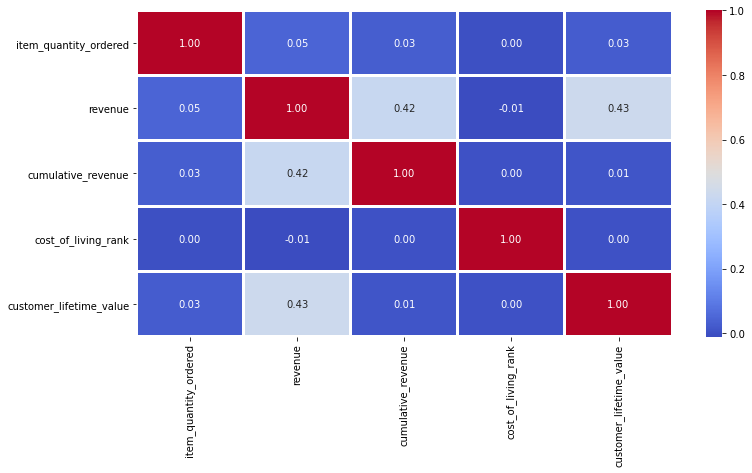

In [270]:
# Buidingg a correlation matrix
corr = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()


From the correlation matrix we can see there is some correlation among the features. Also some key insights can be derived.
- Revenue has a moderate correlation with the target variable customer lifetime value. So it stands out as the primary predictor for our target variable.
- Since revenue and cumulative revenue are correlated, so cumulative revenue might be less impactful unless transformed for any regression model.
- Also cost of living rank shows absolutely no relation to the target variable which gives us an option to exclude it if the model gets complex.


### Conclusion: Revenue seems to be the important feature for the target varibale. So focusing on revenue will simplify the model without compromising the accuracy.



## Data Preparation

In [271]:
# Handling missing values in cost of living rank and customer region
# For categorical variables, lets fill missing values with the mode 
data['customer_region'].fillna(data['customer_region'].mode()[0], inplace=True)

# For numerical variables, lets fill missing values with the median
data['cost_of_living_rank'].fillna(data['cost_of_living_rank'].median(), inplace=True)

For simplicity for now i am filling the categorical values with mode and the rank with median. I will explore other methods going forward as well but for now for simplicity I will be moving forward with this approach


In [272]:
# converting the date column to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

In [273]:
categorical_columns = data.select_dtypes('object').columns
categorical_columns

Index(['customer_id', 'order_number', 'customer_region', 'customer_gender',
       'device'],
      dtype='object')

Since customer_id and order_number are unique identifiers we wil be encoding the other categorial variables only

In [274]:
# removing customer_id and order_number from categorical columns
categorical_columns = categorical_columns.drop(['customer_id', 'order_number'])
#print(categorical_columns)
numerical_columns = data.select_dtypes('number').columns
numerical_columns = numerical_columns.drop(['customer_lifetime_value'])
numerical_columns

Index(['item_quantity_ordered', 'revenue', 'cumulative_revenue',
       'cost_of_living_rank'],
      dtype='object')

In [275]:
# encoding categorical columns
transformed_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
transformed_data.head()



,customer_id,order_number,order_date,item_quantity_ordered,revenue,cumulative_revenue,cost_of_living_rank,customer_lifetime_value,customer_region_Bayern,customer_region_Berlin,...,customer_region_Rheinland-Pfalz,customer_region_Saarland,customer_region_Sachsen-Anhalt,customer_region_Schlewig-Holstein,customer_region_Thüringen,customer_gender_m,customer_gender_undefined,device_mobile,device_mobile-app,device_tablet
0,d43cc724338819d3e6d86e4db4ae2525,fb69e40b059fc2c951ad2e9abd3cbdb4,2019-01-24,1,100.83,0.00,8.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e80173bffd43eaa806445a602c994a47,0a9c5da004072e042268d803d0682d6a,2019-01-09,3,277.29,0.00,5.0,0.00,0,0,...,0,0,0,1,0,1,0,1,0,0
2,4ac7f94acda12131bd8380a6893b4e92,914981f42f4cae42023d0c18ef27d4b9,2019-01-29,1,42.01,672.25,7.0,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,375338a5a6fe1ed0c01cfd2647faa89f,d6f752b53a133dd6640ad6d0aad20ffb,2019-01-06,1,571.42,0.00,9.0,402.84,1,0,...,0,0,0,0,0,1,0,0,0,1
4,31472192d34b462b6b951ed33ec0c65c,015704b78f7970d33bb9be0396d5adc0,2019-01-18,4,678.96,278.55,7.0,100.82,0,0,...,0,0,0,0,0,1,0,0,0,0


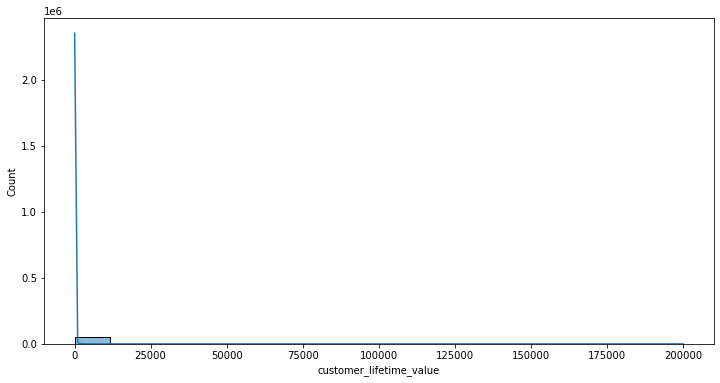

In [276]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(12,6))
sns.histplot(transformed_data['customer_lifetime_value'], kde=True)
plt.show()

In [277]:
# scaling the numerical columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
transformed_data[numerical_columns] = scaler.fit_transform(transformed_data[numerical_columns])
transformed_data.head()


,customer_id,order_number,order_date,item_quantity_ordered,revenue,cumulative_revenue,cost_of_living_rank,customer_lifetime_value,customer_region_Bayern,customer_region_Berlin,...,customer_region_Rheinland-Pfalz,customer_region_Saarland,customer_region_Sachsen-Anhalt,customer_region_Schlewig-Holstein,customer_region_Thüringen,customer_gender_m,customer_gender_undefined,device_mobile,device_mobile-app,device_tablet
0,d43cc724338819d3e6d86e4db4ae2525,fb69e40b059fc2c951ad2e9abd3cbdb4,2019-01-24,-0.463422,-0.081154,-0.083769,0.261607,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e80173bffd43eaa806445a602c994a47,0a9c5da004072e042268d803d0682d6a,2019-01-09,0.860356,0.010703,-0.083769,-0.996902,0.00,0,0,...,0,0,0,1,0,1,0,1,0,0
2,4ac7f94acda12131bd8380a6893b4e92,914981f42f4cae42023d0c18ef27d4b9,2019-01-29,-0.463422,-0.111773,0.662450,-0.157896,0.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,375338a5a6fe1ed0c01cfd2647faa89f,d6f752b53a133dd6640ad6d0aad20ffb,2019-01-06,-0.463422,0.163815,-0.083769,0.681110,402.84,1,0,...,0,0,0,0,0,1,0,0,0,1
4,31472192d34b462b6b951ed33ec0c65c,015704b78f7970d33bb9be0396d5adc0,2019-01-18,1.522245,0.219795,0.225430,-0.157896,100.82,0,0,...,0,0,0,0,0,1,0,0,0,0


Now the missing data have been filled and the categorical variables have been encoded and the numerical columns have been scaled. I have also scaled scaled the target for now as i am not looking for using regularization or any tree based models


## Modelling

In [278]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X = transformed_data.drop(['customer_lifetime_value'], axis=1)
y = transformed_data['customer_lifetime_value']
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X, y, test_size=0.2, random_state=42)

In [279]:
# Using the customer_id and order_number columns as index
X_train_transformed = X_train_transformed.set_index(['customer_id', 'order_number'])
X_test_transformed = X_test_transformed.set_index(['customer_id', 'order_number'])


In [280]:
# Building a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()

# Identify datetime columns
datetime_cols = X_train_transformed.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical values (e.g., timestamp)
for col in datetime_cols:
    X_train_transformed[col] = X_train_transformed[col].astype('int64') // 10**9  # Convert to seconds since epoch
    X_test_transformed[col] = X_test_transformed[col].astype('int64') // 10**9

# Now fit the model
lr = LinearRegression()
lr.fit(X_train_transformed, y_train_transformed)
y_pred = lr.predict(X_test_transformed)
mse = mean_absolute_error(y_test_transformed, y_pred)
print(f'Mean Absolute Error: {mse}')


Mean Absolute Error: 93.01030837094972


As we see the absolute error is very high indicating the predictions from the model are really bad. Lets try removing the unrelated columns and try again

Feature Selection:

Keeping only Related features including Revenue, customer id as index, cum revenue, and item ordered

Scaling and Encoding:

Standard scaling is applied to numerical features, which is important for models sensitive to feature ranges, such as regression.


The data is split into training (80%) and testing (20%) sets to assess model performance.
The distribution of the log-transformed target variable in the training data to confirm normalization after the log transformation is visualised.

In [281]:
# Lets try the model with just customer id, revenue, cumulative revenus and items ordered

mod_data = data[['customer_id', 'revenue', 'cumulative_revenue', 'item_quantity_ordered']]
mod_target = data['customer_lifetime_value']




In [282]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(mod_data, mod_target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44128, 4), (11033, 4), (44128,), (11033,))

Since none of these columns have any missing values lets move on

In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# set index
X_train = X_train.set_index('customer_id')
X_test = X_test.set_index('customer_id')

# Initialize the LinearRegression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict and calculate the mean absolute error using the linear regression model
y_pred = lr.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mse}')


Mean Absolute Error: 88.51108002179373


Now the model is simple and it is getting better with just the related columns altough there might be other models that could be effective lets explore those


In [284]:
# Implementing gris search to find a best model and parameters

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}
# Define the models to be used in GridSearchCV
models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'GradientBoosting': GradientBoostingRegressor()
}

# Define the parameter grid for each model
param_grids = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 15]
    },
    'LinearRegression': {
        'fit_intercept': [True, False]
    },
    'Ridge': {
        'alpha': [0.1, 1.0, 10.0],
        'fit_intercept': [True, False]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Perform GridSearchCV for each model
best_models = {}
for model_name in models:
    grid_search = GridSearchCV(estimator=models[model_name], param_grid=param_grids[model_name], cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Print the best model for each algorithm
for model_name, model in best_models.items():
    print(f"Best {model_name}: {model}")


Best RandomForest: RandomForestRegressor(max_depth=10, n_estimators=50)
Best LinearRegression: LinearRegression()
Best Ridge: Ridge(alpha=10.0)
Best GradientBoosting: GradientBoostingRegressor(n_estimators=150)


In [285]:
# Predict and calculate the mean absolute error using the best model
y_pred = best_models['RandomForest'].predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mse}')


Mean Absolute Error: 81.68049312247352


Here by just using an ensemble tree method model the results have shown some promise. But still this model is based on no preprocessing whats so ever . Lets try fitting the same model for the preprocessed data.


In [286]:
# Fitting the best nodel to the transformed data
best_models['RandomForest'].fit(X_train_transformed, y_train_transformed)

# Predict and calculate the mean absolute error using the best model
y_pred = best_models['RandomForest'].predict(X_test_transformed)
mse = mean_absolute_error(y_test_transformed, y_pred)
print(f'Mean Absolute Error: {mse}')



Mean Absolute Error: 83.60304724129786


It is indeed better than the linear regression. But as we saw in the EDA part the revenue which we concluded might be the important feature for the analysis of target variable might not be in a good shape and scaling the target variable like that would be a problem at times as well. So lets try a transformation approach with only the important variables again.

In [287]:
#looking at the data
mod_data.head()

,customer_id,revenue,cumulative_revenue,item_quantity_ordered
0,d43cc724338819d3e6d86e4db4ae2525,100.83,0.00,1
1,e80173bffd43eaa806445a602c994a47,277.29,0.00,3
2,4ac7f94acda12131bd8380a6893b4e92,42.01,672.25,1
3,375338a5a6fe1ed0c01cfd2647faa89f,571.42,0.00,1
4,31472192d34b462b6b951ed33ec0c65c,678.96,278.55,4


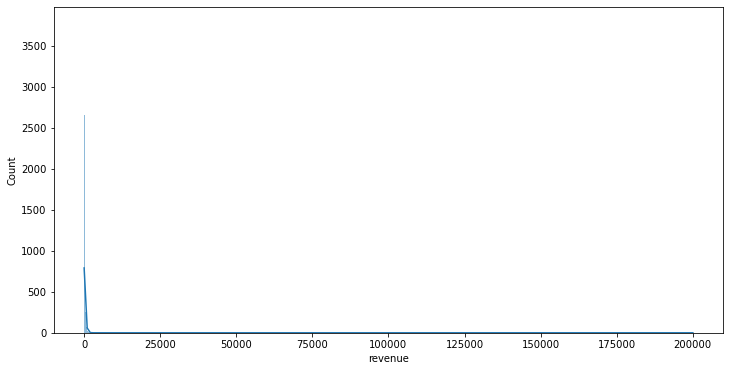

In [288]:
#Visualising revenue
plt.figure(figsize=(12,6))
sns.histplot(mod_data['revenue'], kde=True)
plt.show()


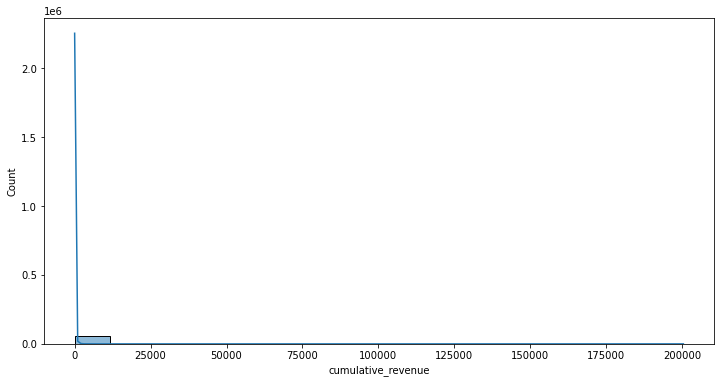

In [289]:
# visualising cumulative revenue
plt.figure(figsize=(12,6))
sns.histplot(mod_data['cumulative_revenue'], kde=True)
plt.show()




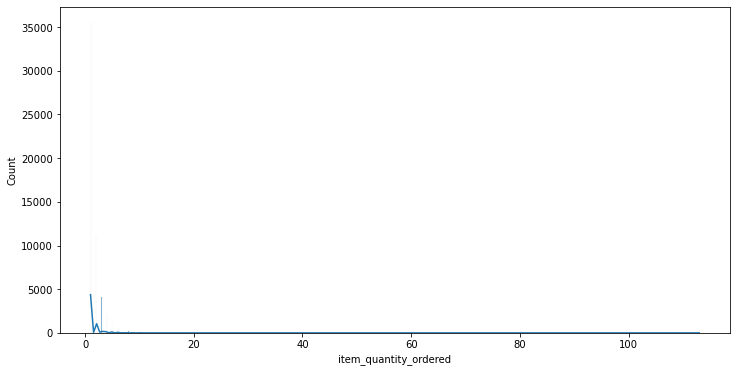

In [290]:
# visualising item quantity ordered
plt.figure(figsize=(12,6))
sns.histplot(mod_data['item_quantity_ordered'], kde=True)
plt.show()


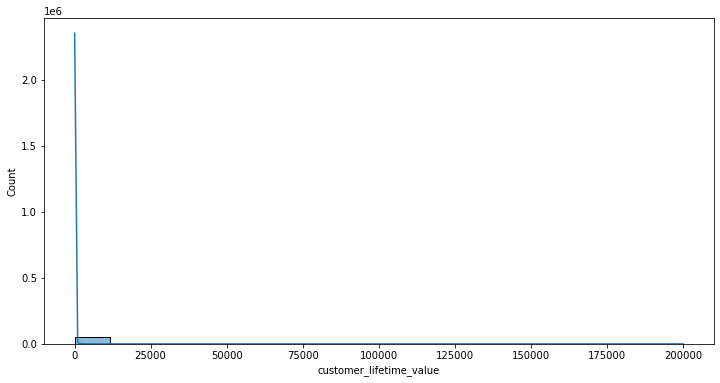

In [291]:
# visualising customer lifetime value
plt.figure(figsize=(12,6))
sns.histplot(mod_target, kde=True)
plt.show()


Issue: Skewness in the customer lifetime value and revenue could make modelling challenging and lead to biased predictions. Hence, as a solution Log transformation has been applied to normalise these distributions.

In [292]:
#Transformimg the data using log transformation
mod_data['revenue'] = np.log1p(mod_data['revenue'])
mod_data['cumulative_revenue'] = np.log1p(mod_data['cumulative_revenue'])
mod_data['item_quantity_ordered'] = np.log1p(mod_data['item_quantity_ordered'])
mod_target = np.log1p(mod_target)


<ipython-input-292-05e34f693adc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_data['revenue'] = np.log1p(mod_data['revenue'])
<ipython-input-292-05e34f693adc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_data['cumulative_revenue'] = np.log1p(mod_data['cumulative_revenue'])
<ipython-input-292-05e34f693adc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

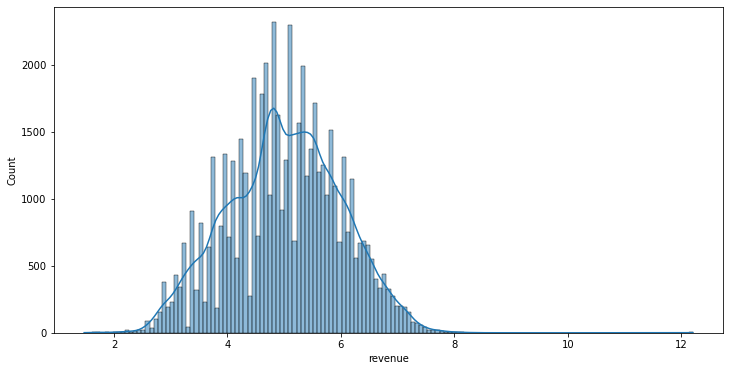

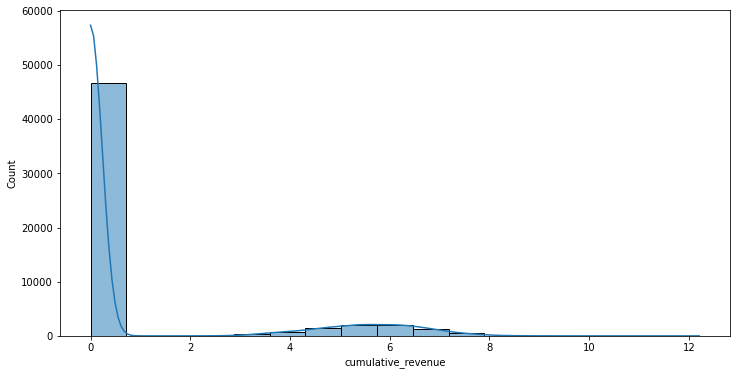

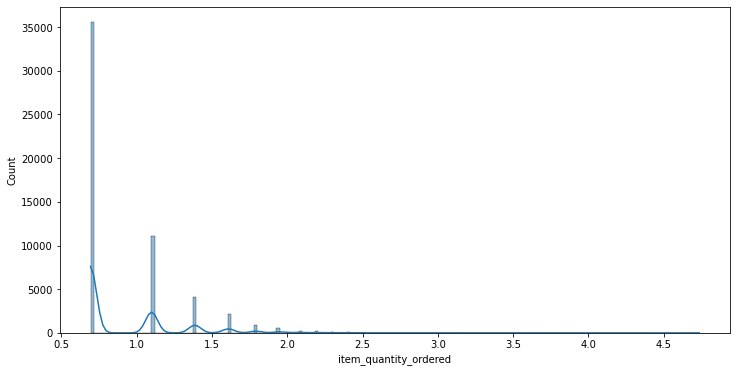

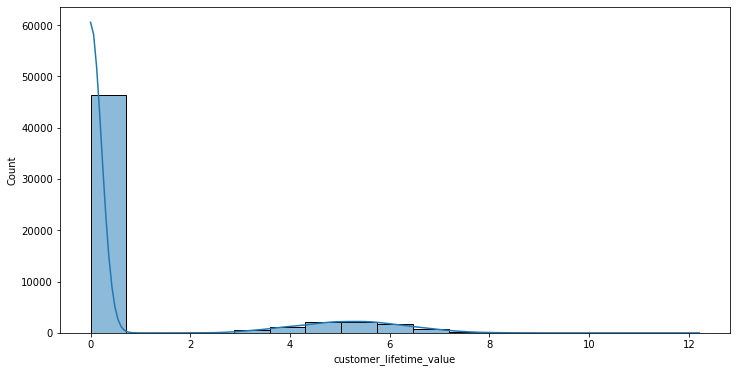

In [293]:
# Visualising after transformation
plt.figure(figsize=(12,6))
sns.histplot(mod_data['revenue'], kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(mod_data['cumulative_revenue'], kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(mod_data['item_quantity_ordered'], kde=True)
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(mod_target, kde=True)
plt.show()


In [294]:
mod_data.head()

,customer_id,revenue,cumulative_revenue,item_quantity_ordered
0,d43cc724338819d3e6d86e4db4ae2525,4.623305,0.000000,0.693147
1,e80173bffd43eaa806445a602c994a47,5.628664,0.000000,1.386294
2,4ac7f94acda12131bd8380a6893b4e92,3.761433,6.512117,0.693147
3,375338a5a6fe1ed0c01cfd2647faa89f,6.349873,0.000000,0.693147
4,31472192d34b462b6b951ed33ec0c65c,6.522034,5.633181,1.609438


In [295]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(mod_data, mod_target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((44128, 4), (11033, 4), (44128,), (11033,))

In [296]:
# Setting index
X_train = X_train.set_index('customer_id')
X_test = X_test.set_index('customer_id')

# Lets fit th ebest regressor model like earlier
best_models['RandomForest'].fit(X_train, y_train)

# Predict and calculate the mean absolute error using the best model
y_pred = best_models['RandomForest'].predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mse}')


Mean Absolute Error: 1.3246941165552062


This is the best performing model


I applied the log transformation as the variables were really skewed in terms of magnitude and then opted for an ensemble method rather than just opting for a simple linear regressor as the provided model.

First, the log transformation managed the skewness in the target variable since large outliers would have less effect and variance became stabilized. Further, it made the distribution of data closer to normal, hence feasible for the regression model. Log transformation allowed the interpretation of model outputs in terms of percentage changes, often far more intuitive, especially in contexts involving growth or multiplicative effects.

I then decided to use a Random Forest Regressor instead of the simple Linear Regression model, considering that the relationships might be pretty complex and nonlinear. Unlike Linear Regression, which assumes there is a strictly linear relationship between predictors and the target, Random Forests can naturally capture non-linear patterns and interactions between features.

 The log transformation coupled with Random Forest Regressor helped me achieve more accurate and reliable predictions by unlocking the complex pattern capturing in the data, handling skewness, and reducing extreme values. This approach, therefore, outperforms a simple Linear Regression model that could have the non-linearity and variance of this data.

### Potential next steps
- Instead of filling the missing values with mode and median , we could implement a simple ML model and regress the numerical values that are missing. This would be a roboust approach for both categorical and numerical variabale.

- Instead of scaling we could also try regularizations that would compensate fro the correlated variables and may contribute for better results. 